## 1. Introduction to Baby Names Data
<blockquote>
  <p>What’s in a name? That which we call a rose, By any other name would smell as sweet.</p>
</blockquote>
<p>In this project, we will explore a rich dataset of first names of babies born in the US, that spans a period of more than 100 years! This suprisingly simple dataset can help us uncover so many interesting stories, and that is exactly what we are going to be doing. </p>
<p>Let us start by reading the data.</p>

In [41]:
# Import modules

import pandas as pd
# Read names into a dataframe: bnames

bnames=pd.read_csv('datasets/names.csv.gz')

bnames.head(2)

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880


## 2. Exploring Trends in Names
<p>One of the first things we want to do is to understand naming trends. Let us start by figuring out the top five most popular male and female names for this decade (born 2011 and later). Do you want to make any guesses? Go on, be a sport!!</p>

In [43]:
aggregations = {'births':{'births':'sum'},
                'year':{'year':'min'}
               }
subset = bnames[bnames.year>=2011].groupby(['name','sex']).agg(aggregations).reset_index()
subset.columns= subset.columns.droplevel(0)
subset.columns=['name','sex','births','year']
subset=subset[['name','sex','births']].sort(columns='births',ascending=False)

bnames_top5=subset[subset.sex=='F'].head(5)
males=subset[subset.sex=='M'].head(5)

bnames_top5=bnames_top5.append(other=males,ignore_index=True)
print(bnames_top5)

       name sex  births
0      Emma   F  121375
1    Sophia   F  117352
2    Olivia   F  111691
3  Isabella   F  103947
4       Ava   F   94507
5      Noah   M  110280
6     Mason   M  105104
7     Jacob   M  104722
8      Liam   M  103250
9   William   M   99144


## 3. Proportion of Births
<p>While the number of births is a useful metric, making comparisons across years becomes difficult, as one would have to control for population effects. One way around this is to normalize the number of births by the total number of births in that year.</p>

In [45]:
bnames2 = bnames.copy()
aggr={'births':'sum'}
year_totals = bnames2.groupby('year').agg(aggr).reset_index()

final=bnames2.merge(year_totals, on="year")
final['prop_births']=final['births_x']/final['births_y']

bnames2 = final[['name','sex','births_x','year','prop_births']]
bnames2.columns=['name','sex','births','year','prop_births']
print(bnames2)

              name sex  births  year  prop_births
0             Mary   F    7065  1880     0.035065
1             Anna   F    2604  1880     0.012924
2             Emma   F    2003  1880     0.009941
3        Elizabeth   F    1939  1880     0.009624
4           Minnie   F    1746  1880     0.008666
5         Margaret   F    1578  1880     0.007832
6              Ida   F    1472  1880     0.007306
7            Alice   F    1414  1880     0.007018
8           Bertha   F    1320  1880     0.006551
9            Sarah   F    1288  1880     0.006393
10           Annie   F    1258  1880     0.006244
11           Clara   F    1226  1880     0.006085
12            Ella   F    1156  1880     0.005737
13        Florence   F    1063  1880     0.005276
14            Cora   F    1045  1880     0.005187
15          Martha   F    1040  1880     0.005162
16           Laura   F    1012  1880     0.005023
17          Nellie   F     995  1880     0.004938
18           Grace   F     982  1880     0.004874


## 4. Popularity of Names
<p>Now that we have the proportion of births, let us plot the popularity of a name through the years. How about plotting the popularity of the female names <code>Elizabeth</code>, and <code>Deneen</code>, and inspecting the underlying trends for any interesting patterns!</p>

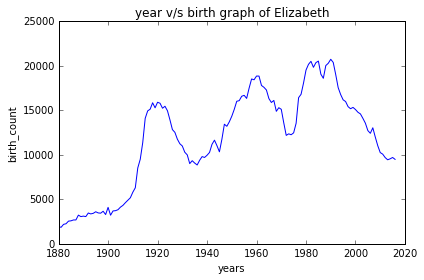

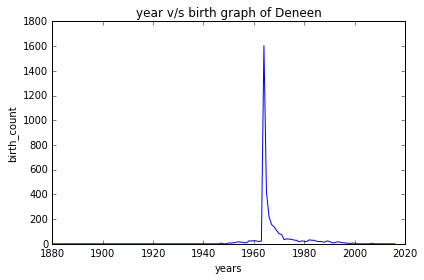

In [47]:
# Set up matplotlib for plotting in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt
def plot_trends(name, sex):
    plt.figure()
    x = bnames.year.unique()
    df_x=pd.DataFrame(x,columns=['year'])
    y = bnames[bnames.name==name][bnames.sex==sex][['births','year']]
    df=df_x.merge(y,on="year",how='left')
    df.births.fillna(value=0,inplace=True)
    plt.plot(df.year,df.births)
    
    plt.xlabel('years')
    plt.ylabel('birth_count')
    plt.title('year v/s birth graph of '+str(name))
    return


# Plot trends for Elizabeth and Deneen 
plot_trends('Elizabeth','F')
plot_trends('Deneen','F')
    
# How many times did these female names peak?
num_peaks_elizabeth = 3
num_peaks_deneen    = 1

## 5. Trendy vs. Stable Names
<p>Based on the plots we created earlier, we can see that <strong>Elizabeth</strong> is a fairly stable name, while <strong>Deneen</strong> is not. An interesting question to ask would be what are the top 5 stable and top 5 trendiest names. A stable name is one whose proportion across years does not vary drastically, while a trendy name is one whose popularity peaks for a short period and then dies down. </p>
<p>There are many ways to measure trendiness. A simple measure would be to look at the maximum proportion of births for a name, normalized by the sume of proportion of births across years. For example, if the name <code>Joe</code> had the proportions <code>0.1, 0.2, 0.1, 0.1</code>, then the trendiness measure would be <code>0.2/(0.1 + 0.2 + 0.1 + 0.1)</code> which equals <code>0.5</code>.</p>
<p>Let us use this idea to figure out the top 10 trendy names in this data set, with at least a 1000 births.</p>

In [49]:
# top10_trendy_names | A Data Frame of the top 10 most trendy names
aggre={'births':{'max_births':'max','total_births':'sum'}}
maximum= bnames.groupby(['name','sex']).agg(aggre).reset_index()
maximum.columns.droplevel(0)
maximum.columns=['name','sex','total','max']
maximum['trendiness']=maximum['max']/maximum['total']
top10_trendy_names= maximum[maximum.total>1000].sort(columns='trendiness',ascending=False).head(10)
print(top10_trendy_names)

           name sex  total   max  trendiness
19116  Christop   M   1082  1082    1.000000
83611   Royalty   F   1057   581    0.549669
55721     Kizzy   F   2325  1116    0.480000
2430     Aitana   F   1203   564    0.468828
25420    Deneen   F   3602  1604    0.445308
70580    Moesha   F   1067   426    0.399250
65768    Marely   F   2527  1004    0.397309
50745     Kanye   M   1304   507    0.388804
95558  Tennille   F   2172   769    0.354052
49407   Kadijah   F   1411   486    0.344437


## 6. Bring in Mortality Data
<p>So, what more is in a name? Well, with some further work, it is possible to predict the age of a person based on the name (Whoa! Really????). For this, we will need actuarial data that can tell us the chances that someone is still alive, based on when they were born. Fortunately, the <a href="https://www.ssa.gov/">SSA</a> provides detailed <a href="https://www.ssa.gov/oact/STATS/table4c6.html">actuarial life tables</a> by birth cohorts.</p>
<table>
<thead>
<tr>
<th style="text-align:right;">year</th>
<th style="text-align:right;">age</th>
<th style="text-align:right;">qx</th>
<th style="text-align:right;">lx</th>
<th style="text-align:right;">dx</th>
<th style="text-align:right;">Lx</th>
<th style="text-align:right;">Tx</th>
<th style="text-align:right;">ex</th>
<th style="text-align:left;">sex</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:right;">1910</td>
<td style="text-align:right;">39</td>
<td style="text-align:right;">0.00283</td>
<td style="text-align:right;">78275</td>
<td style="text-align:right;">222</td>
<td style="text-align:right;">78164</td>
<td style="text-align:right;">3129636</td>
<td style="text-align:right;">39.98</td>
<td style="text-align:left;">F</td>
</tr>
<tr>
<td style="text-align:right;">1910</td>
<td style="text-align:right;">40</td>
<td style="text-align:right;">0.00297</td>
<td style="text-align:right;">78053</td>
<td style="text-align:right;">232</td>
<td style="text-align:right;">77937</td>
<td style="text-align:right;">3051472</td>
<td style="text-align:right;">39.09</td>
<td style="text-align:left;">F</td>
</tr>
<tr>
<td style="text-align:right;">1910</td>
<td style="text-align:right;">41</td>
<td style="text-align:right;">0.00318</td>
<td style="text-align:right;">77821</td>
<td style="text-align:right;">248</td>
<td style="text-align:right;">77697</td>
<td style="text-align:right;">2973535</td>
<td style="text-align:right;">38.21</td>
<td style="text-align:left;">F</td>
</tr>
<tr>
<td style="text-align:right;">1910</td>
<td style="text-align:right;">42</td>
<td style="text-align:right;">0.00332</td>
<td style="text-align:right;">77573</td>
<td style="text-align:right;">257</td>
<td style="text-align:right;">77444</td>
<td style="text-align:right;">2895838</td>
<td style="text-align:right;">37.33</td>
<td style="text-align:left;">F</td>
</tr>
<tr>
<td style="text-align:right;">1910</td>
<td style="text-align:right;">43</td>
<td style="text-align:right;">0.00346</td>
<td style="text-align:right;">77316</td>
<td style="text-align:right;">268</td>
<td style="text-align:right;">77182</td>
<td style="text-align:right;">2818394</td>
<td style="text-align:right;">36.45</td>
<td style="text-align:left;">F</td>
</tr>
<tr>
<td style="text-align:right;">1910</td>
<td style="text-align:right;">44</td>
<td style="text-align:right;">0.00351</td>
<td style="text-align:right;">77048</td>
<td style="text-align:right;">270</td>
<td style="text-align:right;">76913</td>
<td style="text-align:right;">2741212</td>
<td style="text-align:right;">35.58</td>
<td style="text-align:left;">F</td>
</tr>
</tbody>
</table>
<p>You can read the <a href="https://www.ssa.gov/oact/NOTES/as120/LifeTables_Body.html">documentation for the lifetables</a> to understand what the different columns mean. The key column of interest to us is <code>lx</code>, which provides the number of people born in a <code>year</code> who live upto a given <code>age</code>. The probability of being alive can be derived as <code>lx</code> by 100,000. </p>
<p>Given that 2016 is the latest year in the baby names dataset, we are interested only in a subset of this data, that will help us answer the question, "What percentage of people born in Year X are still alive in 2016?" </p>
<p>Let us use this data and plot it to get a sense of the mortality distribution!</p>

      year  age       qx       lx     dx      Lx         Tx     ex sex
116   1900  116  0.83363      0.0      0       0          0   0.69   M
236   1900  116  0.83363      0.0      0       0          0   0.69   F
346   1910  106  0.51178      7.0      3       5          9   1.38   M
466   1910  106  0.47062     61.0     29      47         92   1.52   F
576   1920   96  0.30765   1625.0    500   1,375      4,000   2.46   M
696   1920   96  0.25681   5428.0  1,394   4,731     15,788   2.91   F
806   1930   86  0.12620  20766.0  2,621  19,455    105,149   5.06   M
926   1930   86  0.09239  35078.0  3,241  33,458    216,619   6.18   F
1036  1940   76  0.04469  52262.0  2,336  51,094    527,017  10.08   M
1156  1940   76  0.03168  65417.0  2,072  64,380    783,771  11.98   F
1266  1950   66  0.01825  74633.0  1,362  73,952  1,261,965  16.91   M
1386  1950   66  0.01268  83676.0  1,061  83,145  1,631,592  19.50   F
1496  1960   56  0.00708  85491.0    605  85,188  2,162,629  25.30   M
1616  

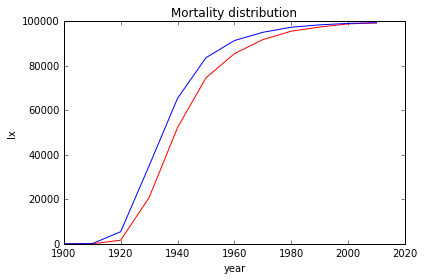

In [51]:
# Read lifetables from datasets/lifetables.csv
lifetables=pd.read_csv('datasets/lifetables.csv')
# Extract subset relevant to those alive in 2016
lifetables_2016 = lifetables[lifetables.year + lifetables.age == 2016]
print(lifetables_2016)
# Plot the mortality distribution: year vs. lx
plt.plot(lifetables_2016[lifetables_2016.sex=='M'].year,lifetables_2016[lifetables_2016.sex=='M'].lx,color='red')
plt.plot(lifetables_2016[lifetables_2016.sex=='F'].year,lifetables_2016[lifetables_2016.sex=='F'].lx,color='blue')
plt.xlabel('year')
plt.ylabel('lx')
plt.title('Mortality distribution')
plt.show()

## 7. Smoothen the Curve!
<p>We are almost there. There is just one small glitch. The cohort life tables are provided only for every decade. In order to figure out the distribution of people alive, we need the probabilities for every year. One way to fill up the gaps in the data is to use some kind of interpolation. Let us keep things simple and use linear interpolation to fill out the gaps in values of <code>lx</code>, between the years <code>1900</code> and <code>2016</code>.</p>

     year       lx sex
0    1900      0.0   M
1    1901      0.7   M
2    1902      1.4   M
3    1903      2.1   M
4    1904      2.8   M
5    1905      3.5   M
6    1906      4.2   M
7    1907      4.9   M
8    1908      5.6   M
9    1909      6.3   M
10   1910      7.0   M
11   1911    168.8   M
12   1912    330.6   M
13   1913    492.4   M
14   1914    654.2   M
15   1915    816.0   M
16   1916    977.8   M
17   1917   1139.6   M
18   1918   1301.4   M
19   1919   1463.2   M
20   1920   1625.0   M
21   1921   3539.1   M
22   1922   5453.2   M
23   1923   7367.3   M
24   1924   9281.4   M
25   1925  11195.5   M
26   1926  13109.6   M
27   1927  15023.7   M
28   1928  16937.8   M
29   1929  18851.9   M
..    ...      ...  ..
86   1986  98017.6   F
87   1987  98124.7   F
88   1988  98231.8   F
89   1989  98338.9   F
90   1990  98446.0   F
91   1991  98513.0   F
92   1992  98580.0   F
93   1993  98647.0   F
94   1994  98714.0   F
95   1995  98781.0   F
96   1996  98848.0   F
97   1997  

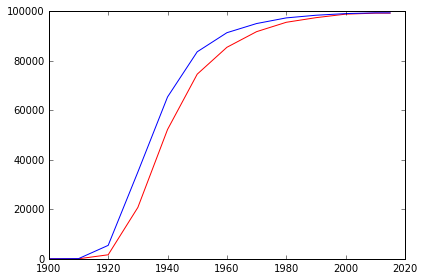

In [53]:
# Create smoothened lifetable_2016_s by interpolating values of lx
years_calculated = pd.DataFrame([i for i in range(1900,2016)],columns=['year'])

lifetable_2016_s_m = years_calculated.merge(lifetables_2016[['lx','sex','year']][lifetables_2016.year>=1900][lifetables_2016.year<=2016][lifetables_2016.sex=='M'],how='left',on="year")
lifetable_2016_s_ml=lifetable_2016_s_m.lx.interpolate('linear',limit=10)
lifetable_2016_s_m['sex']='M'
lifetable_2016_s_m['lx']= lifetable_2016_s_ml
plt.plot(years_calculated,lifetable_2016_s_ml,color='red')


lifetable_2016_s_f = years_calculated.merge(lifetables_2016[['lx','sex','year']][lifetables_2016.year>=1900][lifetables_2016.year<=2016][lifetables_2016.sex=='F'],how='left',on="year")
lifetable_2016_s_fl=lifetable_2016_s_f.lx.interpolate('linear',limit=10)
lifetable_2016_s_f['sex']='F'
lifetable_2016_s_f['lx']= lifetable_2016_s_fl
plt.plot(years_calculated,lifetable_2016_s_fl,color='blue')

lifetable_2016_s=lifetable_2016_s_m.append(lifetable_2016_s_f)
print(lifetable_2016_s)

## 8. Distribution of People Alive by Name
<p>Now that we have all the required data, we need a few helper functions to help us with our analysis. </p>
<p>The first function we will write is <code>get_data</code>,which takes <code>name</code> and <code>sex</code> as inputs and returns a data frame with the distribution of number of births and number of people alive by year.</p>
<p>The second function is <code>plot_name</code> which accepts the same arguments as <code>get_data</code>, but returns a line plot of the distribution of number of births, overlaid by an area plot of the number alive by year.</p>
<p>Using these functions, we will plot the distribution of births for boys named <strong>Joseph</strong> and girls named <strong>Brittany</strong>.</p>

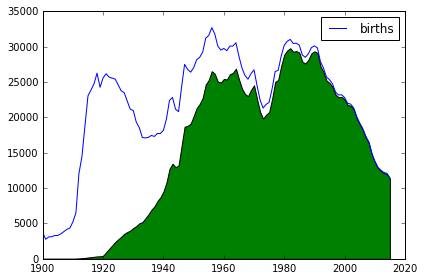

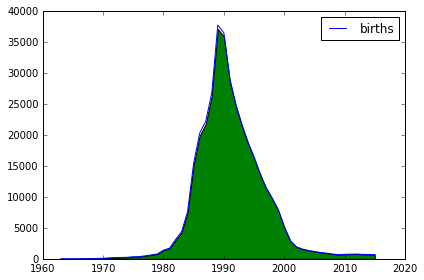

In [55]:
def get_data(name, sex):
    data_returned = bnames[bnames.name==name][bnames.sex==sex].merge(lifetable_2016_s,how='inner',on=['year','sex'])
    data_returned['n_alive'] = (data_returned.lx * data_returned.births)/100000
    return data_returned
    

def plot_data(name, sex):
    plt.figure()
    data_obtained=get_data(name,sex)
    plt.plot(data_obtained.year,data_obtained.births)
    plt.stackplot(data_obtained.year,data_obtained.n_alive)
    plt.legend()
    plt.show()
    return 
    
# Plot the distribution of births and number alive for Joseph and Brittany
plot_data('Joseph','M')
plot_data('Brittany','F')

## 9. Estimate Age
<p>In this section, we want to figure out the probability that a person with a certain name is alive, as well as the quantiles of their age distribution. In particular, we will estimate the age of a female named <strong>Gertrude</strong>. Any guesses on how old a person with this name is? How about a male named <strong>William</strong>?</p>

In [79]:
# Import modules
from wquantiles import quantile

# Function to estimate age quantiles
def estimate_age(name, sex):
    dfg = get_data(name,sex)
    result={}
    result['name'] = name
    result['p_alive'] =  dfg.n_alive.mean()/dfg.births.mean()
    result['q25'] = 2016-quantile(dfg.year,dfg.n_alive,0.25)
    result['q50'] = 2016-quantile(dfg.year,dfg.n_alive,0.50)
    result['q75'] = 2016-quantile(dfg.year,dfg.n_alive,0.75)
    result['sex'] = sex
    return pd.Series(result)

# Estimate the age of Gertrude
print(estimate_age('Gertrude','F'))
print(estimate_age('William','M'))

name       Gertrude
p_alive    0.187256
q25         88.4885
q50         79.9437
q75         69.0775
sex               F
dtype: object
name        William
p_alive    0.613192
q25         65.4069
q50         51.9855
q75         30.4931
sex               M
dtype: object


## 10. Median Age of Top 10 Female Names
<p>In the previous section, we estimated the age of a female named Gertrude. Let's go one step further this time, and compute the 25th, 50th and 75th percentiles of age, and the probability of being alive for the top 10 most common female names of all time. This should give us some interesting insights on how these names stack up in terms of median ages!</p>

In [90]:
# Create median_ages: DataFrame with Top 10 Female names, 
#    age percentiles and probability of being alive
female_names=subset[['name','sex']][subset.sex=='F'].head(10)
raw={}
median_ages=pd.DataFrame(raw,columns=['name','p_alive','q25','q50','q75','sex'])
for i in female_names.values:
    median_ages=median_ages.append(estimate_age(i[0],i[1]),ignore_index=True)

median_ages=median_ages.sort(columns='q50',ascending=False)
print(median_ages)

        name   p_alive        q25        q50        q75 sex
9  Elizabeth  0.744920  57.517297  37.801482  22.757173   F
6      Emily  0.925989  28.239810  19.391434  11.981368   F
8    Madison  0.991668  16.852947  12.560905   7.834709   F
7    Abigail  0.986541  18.355760  12.299451   6.903058   F
0       Emma  0.767596  18.837957  11.615183   5.866681   F
2     Olivia  0.956136  18.292851  11.372814   5.645621   F
5        Mia  0.990170  12.856574   8.165069   3.955382   F
3   Isabella  0.973684  11.967922   7.899871   4.566412   F
1     Sophia  0.953531  13.270921   7.835890   4.171459   F
4        Ava  0.971168  10.425086   7.288410   3.880700   F
